# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [2]:
url = "https://drive.google.com/uc?id=1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY"
titanic_df = pd.read_csv(url)

❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [3]:
print(titanic_df.shape)
print(titanic_df.dtypes)
print(titanic_df.describe())
print(titanic_df.info())
print(titanic_df.isnull().sum())

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean 

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [5]:
titanic_df = titanic_df.drop('Cabin', axis=1)

## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [6]:
pclass_df = titanic_df.groupby('Pclass').size()

Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

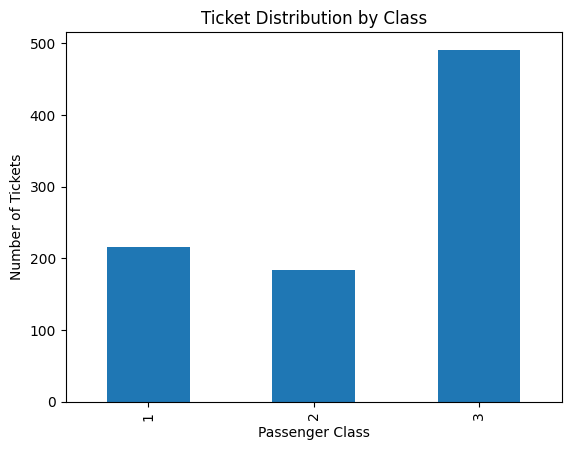

In [7]:
pclass_df.plot(kind='bar')
plt.ylabel('Number of Tickets')
plt.xlabel('Passenger Class')
plt.title('Ticket Distribution by Class')
plt.show()

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

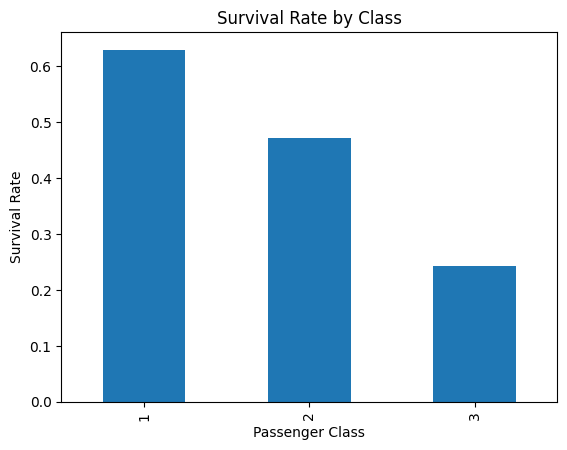

In [10]:
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.title('Survival Rate by Class')
plt.show()

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [12]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

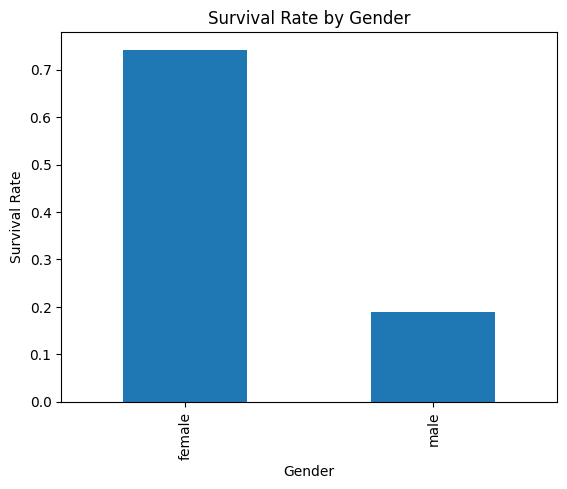

In [13]:
survived_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
survived_by_sex.plot(kind='bar')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.title('Survival Rate by Gender')
plt.show()

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

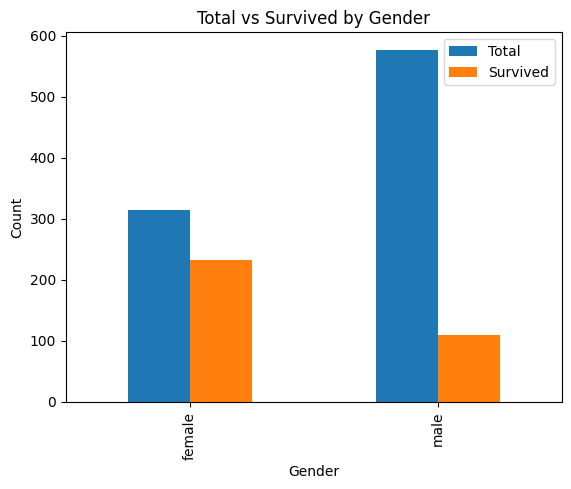

In [14]:
survivors_df = pd.DataFrame({
    'Total': titanic_df.groupby('Sex').size(),
    'Survived': titanic_df.groupby('Sex')['Survived'].sum()
})
survivors_df.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Total vs Survived by Gender')
plt.show()

## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [16]:
children_df = titanic_df[titanic_df['Age'] < 18]

❓ Titanic’te kaç çocuk vardı?

In [17]:
len(children_df)

113

❓Kaç çocuk hayatta kaldı?

In [19]:
children_df['Survived'].sum()

61

❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

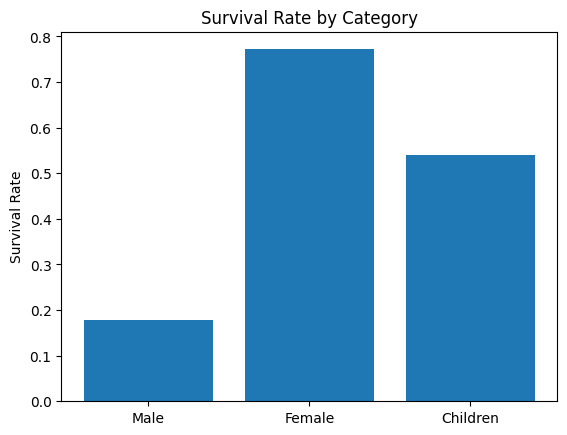

In [20]:
male_survived = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 18)]['Survived'].mean()
female_survived = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Age'] >= 18)]['Survived'].mean()
children_survived = children_df['Survived'].mean()

categories = ['Male', 'Female', 'Children']
survival_rates = [male_survived, female_survived, children_survived]

plt.bar(categories, survival_rates)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Category')
plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

In [21]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

In [23]:
titanic_df['title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titanic_df.groupby('title')['Survived'].mean().sort_values(ascending=False)

title
Sir         1.000000
Countess    1.000000
Ms          1.000000
Mme         1.000000
Lady        1.000000
Mlle        1.000000
Mrs         0.792000
Miss        0.697802
Master      0.575000
Col         0.500000
Major       0.500000
Dr          0.428571
Mr          0.156673
Jonkheer    0.000000
Don         0.000000
Rev         0.000000
Capt        0.000000
Name: Survived, dtype: float64